In [2]:
import xgi
import matplotlib.pyplot as plt
import numpy as np

## Notebook 1

In [3]:
H = xgi.Hypergraph()
H.add_nodes_from(["A", "B", "C", "D"])
H.add_edges_from([{"A", "B"}, {"A", "B", "C"}])
print(H)

Unnamed Hypergraph with 4 nodes and 2 hyperedges


In [4]:
DH = xgi.DiHypergraph()
DH.add_edge([{"A", "B"}, {"C", "D"}])
print(DH)

Unnamed DiHypergraph with 4 nodes and 1 hyperedges


## Notebook 2

In [5]:
H = xgi.load_xgi_data("contact-high-school")
m1 = H.num_edges

H.cleanup(
    isolates=True,
    singletons=True,
    multiedges=False,
    connected=False,
    relabel=False,
    in_place=True,
)
m2 = H.num_edges

multiplicity = m1 / m2
print(multiplicity)

22.004988488104374


In [6]:
H = xgi.load_xgi_data("congress-bills", max_order=10)
xgi.write_edgelist(H, "edgelist.txt", delimiter="\t")

## Notebook 3

In [7]:
H = xgi.load_xgi_data("kaggle-whats-cooking")

In [8]:
len(H.edges.filterby("size", 5, "gt"))

35991

In [9]:
len(H.nodes.filterby("degree", 1))

1759

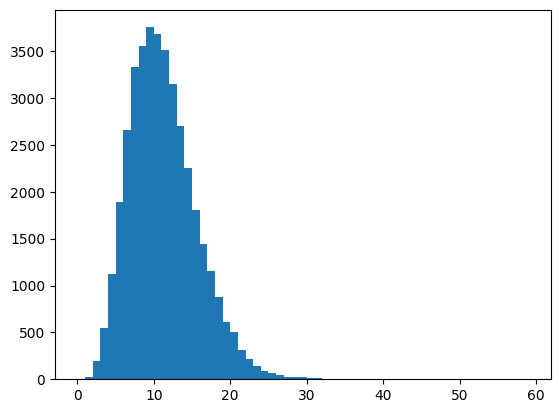

In [10]:
sizes = H.edges.size.asnumpy()
plt.hist(sizes, bins=np.arange(60))
plt.show()

In [11]:
@xgi.nodestat_func
def user_degree(net, bunch):
    """The user degree of a bunch of nodes in net."""
    return {
        n: sum(1.0 / net.edges.size[i] for i in net.nodes.memberships(n)) for n in bunch
    }

In [12]:
H.nodes.user_degree.asdict()

{'5930': 22.178295351530295,
 '3243': 21.64831189603534,
 '2095': 12.104833354926221,
 '2291': 407.99509655863767,
 '4243': 14.170853513120624,
 '1910': 167.4111832511194,
 '3671': 21.16816672170352,
 '5046': 36.23739883296392,
 '252': 634.1297411558674,
 '836': 26.89116076343999,
 '3494': 422.3670163720955,
 '5990': 409.055152582284,
 '4905': 345.88824755946723,
 '3689': 246.83450104985988,
 '1810': 36.44154292278519,
 '2454': 33.93668564411468,
 '5176': 272.6351062655377,
 '1979': 15.912264566458587,
 '5565': 12.182583305067817,
 '4799': 1739.9226392916562,
 '6530': 0.4020382842963488,
 '5635': 62.58698493582502,
 '4578': 296.8645727109014,
 '3013': 91.93955796092646,
 '2440': 43.57506416449622,
 '5965': 5.546664839288676,
 '3311': 128.45053904407146,
 '4335': 511.18327188874173,
 '2387': 82.6022590989806,
 '4910': 733.7578774678709,
 '4215': 2.8701916934115084,
 '4617': 4.038052356140591,
 '5262': 27.36443442355588,
 '6428': 132.23610280739678,
 '678': 673.4065541003648,
 '3240': 22

In [13]:
H.nodes.degree.asdict()

{'5930': 270,
 '3243': 229,
 '2095': 148,
 '2291': 4438,
 '4243': 137,
 '1910': 1896,
 '3671': 228,
 '5046': 358,
 '252': 7380,
 '836': 361,
 '3494': 4784,
 '5990': 4385,
 '4905': 3388,
 '3689': 2263,
 '1810': 385,
 '2454': 341,
 '5176': 3058,
 '1979': 154,
 '5565': 108,
 '4799': 18048,
 '6530': 5,
 '5635': 768,
 '4578': 3296,
 '3013': 1184,
 '2440': 483,
 '5965': 65,
 '3311': 1442,
 '4335': 4847,
 '2387': 781,
 '4910': 7457,
 '4215': 26,
 '4617': 40,
 '5262': 343,
 '6428': 1394,
 '678': 7972,
 '3240': 2627,
 '1327': 1477,
 '6319': 24,
 '5043': 2036,
 '4531': 925,
 '6585': 2747,
 '188': 839,
 '345': 103,
 '2524': 282,
 '4447': 1523,
 '5984': 18,
 '1256': 1970,
 '1922': 1231,
 '891': 678,
 '3941': 501,
 '6700': 1298,
 '20': 6434,
 '2228': 1738,
 '5880': 338,
 '5408': 1730,
 '2': 940,
 '6057': 1094,
 '1452': 554,
 '172': 103,
 '6126': 796,
 '4271': 461,
 '3985': 73,
 '5878': 7971,
 '3969': 22,
 '3976': 1348,
 '6605': 173,
 '602': 51,
 '5308': 1,
 '2583': 965,
 '5700': 1439,
 '5031': 119,

In [14]:
print(
    f"The minimum and maximum number of ingredients are {H.edges.size.min()} and {H.edges.size.max()}, respectively"
)

The minimum and maximum number of ingredients are 1 and 65, respectively


In [22]:
d = H.nodes.degree.asdict()
id = max(d, key=d.get)
print(f"The most popular ingredient is {H.nodes[id]['name']}.")

The most popular ingredient is sugar.
